# Module 1: Data Science Fundamentals
## Sprint 3: Intro to Modeling
## Subproject 2: Correlation Analysis, Linear Regression

Welcome to the 2nd subproject of Sprint 3. In this subproject, for the first time we will actually use data to make predictions!

## Learning outcomes

- Quantify correlation between dataset features.
- Predict features from other features with Linear Regression.

## Correlation Analysis

Correlation analysis, at its core, allows to quantify how related features of your dataset are - if one features changes e.g. is incremented, how other one changes.

Let's start by going through [this](https://realpython.com/numpy-scipy-pandas-correlation-python) tutorial. By the end of it, you should be able differentiate between Pearson's and Spearman's correlation coefficients, and how to calculate correlation between variables in Pandas.


Correlation explains whether variables under study are correlated. What is the strength of their association

## Linear Regression

Linear regression is the most fundamental statistical relationship modeling algorithm. The algorithm builds a line model (often called a trendline), which allows to not only explain linear regression between some variable in the dataset X and other variable Y, but also predict unseen Y values given X!

Linear regression is the functional relationship between variables y = f(x) + c to make future projections on events

Start by watching the intro to linear regression down below:

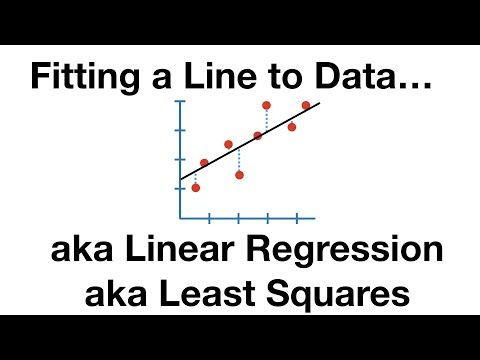

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('PaFPbb66DxQ')

After watching the video above, enroll at [Intro to Machine Learning](https://www.udacity.com/course/intro-to-machine-learning--ud120) (on Udacity) free course. Next, watch a module on linear regression and complete all the quizes, starting from [Lesson 10](https://classroom.udacity.com/courses/ud120/lessons/2301748537/concepts/24828185350923) to the very end of the module. Although you might hear unfamiliar terms e.g. supervised learning, don't think about them just now.

By the end of this section, you should know what linear regression is used for, and how to perform it using Scikit-learn.

### Key takeaways:

* We use linear regression as a tool to model a trendline (like in Excel).
* Regression line explains the numerical relationship between X variable (independent) and Y (dependent).
* Relationship is a weighted sum of X effect on Y. Weight describes how much Y changes when we change X by 1.
* X can be multiple variables, each with its weight.

## Exercise

### Predicting Bicycle Traffic

<div><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Left_side_of_Flying_Pigeon.jpg/2560px-Left_side_of_Flying_Pigeon.jpg" style="height: 350px;"/></div>

We'll follow an example from [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Example:-Predicting-Bicycle-Traffic).

Complete the task yourself and verify afterwards. Don't look at the Jake's solution until you have your own (unless you get stuck), there's no fun in that :).

Objective:

* Predict bike traffic for each day;
* Explain which features affect the number of cyclists most;

Tips:
* Use weather dataset for feature engineering.
* Engineer additional features such as: weeekday, daylight_hrs, is_holiday, temp_celcius, is_dry_day, explain why.

Feature engineering is something that helps you with data cleaning. It is the process of extracting useful features from raw data using math, statistics and domain knowledge egs are outler detection, one-hot encoding, handling missing values

To make things slightly easier, we've downloaded daily bicycle traffic, the daily weather data in Seattle and holiday data, and joined everything.

In case the weather dataset column names seem confusing, check-out [this resource](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00024233/detail), which contains detailed descriptions of each column of the weather dataset.

In [19]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [2]:

counts = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv',  index_col='DATE', parse_dates=True)

Tip - peek into the data. Engineer enough features for `weather` dataframe you might deem useful to predict bicycle traffic. Afterwards, join the datasets and perform regression.

In [3]:
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [4]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,FMTM,WT14,WT01,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,89,112,-9999,1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,130,179,-9999,-9999,1,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,54,67,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,107,148,-9999,-9999,1,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,107,165,-9999,-9999,1,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [5]:
# compute the total daily bicycle traffic, and put this in its own dataframe:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [6]:
daily

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0
...,...
2021-04-26,4822.0
2021-04-27,4484.0
2021-04-28,4764.0


In [7]:
# adding binary column to show patterns of use generally vary from day to day
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [8]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-04-26,4822.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-27,4484.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-04-28,4764.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# we might expect riders to behave differently on holidays; let's add an indicator of this
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [10]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-04-26,4822.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-27,4484.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-28,4764.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(8.0, 17.0)

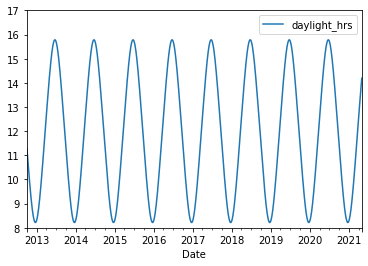

In [13]:
# suspecting that the hours of daylight would affect how many people ride
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [14]:
# temperature of the day could also affect
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [15]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,4822.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.980697,NaN,NaN,NaN
2021-04-27,4484.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.033671,NaN,NaN,NaN
2021-04-28,4764.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.086250,NaN,NaN,NaN


In [16]:
# Finally, let's add a counter that increases from day 1, and measures how many years have passed. 
# This will let us measure any observed annual increase or decrease in daily crossings:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [17]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,4822.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.980697,NaN,NaN,NaN,8.567123
2021-04-27,4484.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.033671,NaN,NaN,NaN,8.569863
2021-04-28,4764.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.086250,NaN,NaN,NaN,8.572603


In [20]:
# we can choose the columns to use, and fit a linear regression model to our data
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

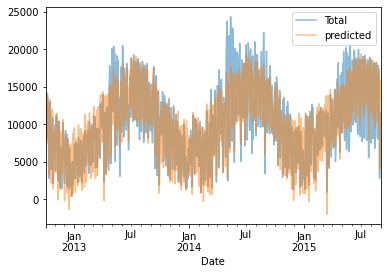

In [21]:
# comparing the total and predicted bicycle traffic visually
daily[['Total', 'predicted']].plot(alpha=0.5);

In [23]:
# take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             2019.531023
Tue             2440.935744
Wed             2370.694566
Thu             1929.432461
Fri              711.921382
Sat            -4413.206842
Sun            -4534.268983
holiday        -4749.605523
daylight_hrs     515.406045
PRCP           -2659.339527
dry day         2190.794369
Temp (C)         260.651164
annual           107.770852
dtype: float64

-----

## Summary

In this subproject, we have studied the most popular data modeling approach - linear regression. Linear models hardly overfit, and they are interpretable, thus often preferred as baselines when modeling the data.